**<center><font size=5>Cameroon Advance Analytic Ultrasound Imageby Camair-AI : hackathon-2023</font></center>**
***
**author**: Charlin DJIOKO SADIO

**date**: 15th September, 2023

**Table of Contents**
- <a href='#intro'>1. Overview hackathon and Objectives</a>
- <a href='#env'>2. libraries and dependencies</a>
- <a href='#import'>3. Data Import and Preprocessing</a>
- <a href='#cnn'>4. CNN Model</a>
    - <a href='#build'>4.1. Model Building and training</a>
    - <a href='#perf'>4.2. Model
- <a href='#concl'>5. Submissions</a>

 # <a href='#intro'>1. Overview hackathon and Objectives</a>

The objective of this challenge is to build a machine learning model ( **CNN**) that can predict if kidneys are in renal failure from ultrasounds.


This solution will be useful in a clinical diagnostic tool used to support clinical decision-making in remote areas. These solutions have the potential to grow into tools to monitor a patient's kidney function and determine treatment plans and hopefully, one day a mobile app to monitor multiple aspects of kidney health. The images are from the Cameroon Health System.

# <a href='#env'>2. libraries and dependencies</a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import random
seed=1
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

# <a href='#import'>3. Data Import and Preprocessing</a>

In [2]:
import zipfile
# Extract images from the Images.zip file
with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall()
# Load the Train.csv and Test.csv files
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
train_df.head()


,img_IDs,target
0,ID_04UTZ83A24,0
1,ID_0URH2U2RON,1
2,ID_0ZEPOZGGQ1,0
3,ID_1595QTX5OA,1
4,ID_1RAE4SS5S6,1


In [3]:
from PIL import Image
# function for preprocessing
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))
    img = img.convert('L')
    img_array = np.array(img) / 255.0
    return img_array
# list of test and train images
train_images = []
train_labels = []

for index, row in train_df.iterrows():
    image_path = f'CAMAIRAI BOX READY/{row["img_IDs"]}.jpg'
    train_images.append(preprocess_image(image_path))
    train_labels.append(row["target"])

test_images = []

for index, row in test_df.iterrows():
    image_path = f'CAMAIRAI BOX READY/{row["img_IDs"]}.jpg'
    test_images.append(preprocess_image(image_path))
# convert images in array
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)


In [4]:
# VALIDATION SET
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)

# <a href='#cnn'>4. CNN Model</a>

# <a href='#build'>4.1. Model Building and training</a>

**We will Build a deep learning model using convolutional neural networks (CNNs) to predict if kidneys are in renal failure from ultrasounds**


In [5]:
# Building
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# training
history = model.fit(train_images, train_labels, epochs=40,
                    batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/40
2/2 [==============================] - 20s 5s/step - loss: 0.7421 - accuracy: 0.5875 - val_loss: 0.5417 - val_accuracy: 0.7500
Epoch 2/40
2/2 [==============================] - 18s 4s/step - loss: 0.6036 - accuracy: 0.6875 - val_loss: 0.7338 - val_accuracy: 0.3000
Epoch 3/40
2/2 [==============================] - 10s 3s/step - loss: 0.6596 - accuracy: 0.5500 - val_loss: 0.6278 - val_accuracy: 0.7500
Epoch 4/40
2/2 [==============================] - 10s 2s/step - loss: 0.6056 - accuracy: 0.6375 - val_loss: 0.5459 - val_accuracy: 0.7500
Epoch 5/40
2/2 [==============================] - 11s 3s/step - loss: 0.6107 - accuracy: 0.6125 - val_loss: 0.5344 - val_accuracy: 0.7500
Epoch 6/40
2/2 [==============================] - 11s 3s/step - loss: 0.5979 - accuracy: 0.6000 - val_loss: 0.5920 - val_accuracy: 0.7000
Epoch 7/40
2/2 [==============================] - 11s 2s/step - loss: 0.5570 - accuracy: 0.7375 - val_loss: 0.5795 - val_accuracy: 0.7500
Epoch 8/40
2/2 [==================

## <a href='#perf'>4.3. Model Performance</a>
 Visualize the model's training history

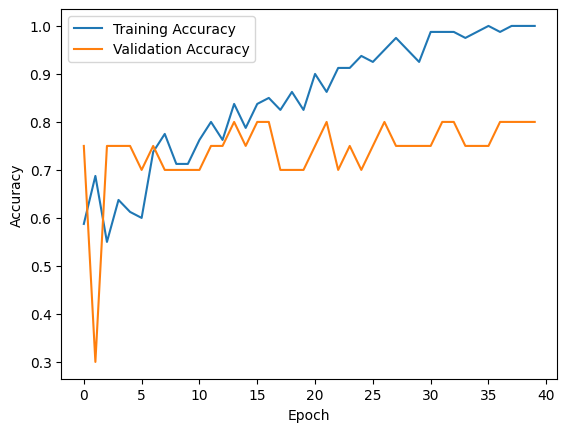

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# <a href='#concl'>5. Submissions</a>

Make predictions on the test set

In [8]:
predictions = model.predict(test_images)
test_df['target'] = predictions
test_df.to_csv('SampleSubmission.csv', index=False)

2/2 [==============================] - 1s 70ms/step


In [9]:
test_df

,img_IDs,target
0,ID_07VWE8S4AH,0.008127
1,ID_1TTSQF7HN0,0.485958
2,ID_21WVBU9ZMU,0.313833
3,ID_2MHAFTL1KN,0.979786
4,ID_37ULEGW12M,0.999988
5,ID_8REUNTV3UL,0.999929
6,ID_8YJA423CAB,0.998229
7,ID_9HM1CMMDEI,0.402468
8,ID_9NAGF1CGWB,1.000000
9,ID_9PHABIBP5K,0.008178
